## 1. Import Necessary libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np 

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Import Data

In [3]:
emp_data = pd.read_csv('/content/drive/MyDrive/Dataset/employee_promotion_prediction.csv')

In [4]:
emp_data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0


## 3. Data Understanding

In [5]:
emp_data['previous_year_rating'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
54803    False
54804    False
54805    False
54806    False
54807    False
Name: previous_year_rating, Length: 54808, dtype: bool

In [6]:
emp_data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [7]:
pd.set_option('display.max_rows', 4200)


In [8]:
emp_data[emp_data['previous_year_rating'].isnull()].head(500)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,77.0,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,70.0,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,44.0,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,49.0,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,0,47.0,0
62,9150,Analytics,region_22,Bachelor's,f,other,1,28,NaN,1,0,80.0,0
66,77981,Finance,region_22,Bachelor's,m,other,1,27,NaN,1,1,58.0,1
67,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,NaN,1,0,NaN,1
84,44575,Legal,region_7,Bachelor's,m,other,1,29,NaN,1,0,65.0,1
89,9589,Sales & Marketing,region_31,Bachelor's,f,other,1,31,NaN,1,0,51.0,0


In [9]:
emp_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score      float64
is_promoted               int64
dtype: object

In [10]:
emp_data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [11]:
emp_data.shape

(54808, 13)

In [12]:
emp_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


## 3. Data Visualization

### Finding the Correlation Between featurs

In [13]:
emp_data.corr().style.background_gradient()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,0.008420,-0.000661,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.007628,0.044430,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.008169,-0.049500,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.027738,0.075474,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.039927,-0.039381,-0.010670
awards_won,0.008420,-0.007628,-0.008169,0.027738,-0.039927,1.000000,0.073963,0.195871
avg_training_score,-0.000661,0.044430,-0.049500,0.075474,-0.039381,0.073963,1.000000,0.184386
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.195871,0.184386,1.000000


###  Determining the Promoted candidates WRT Region

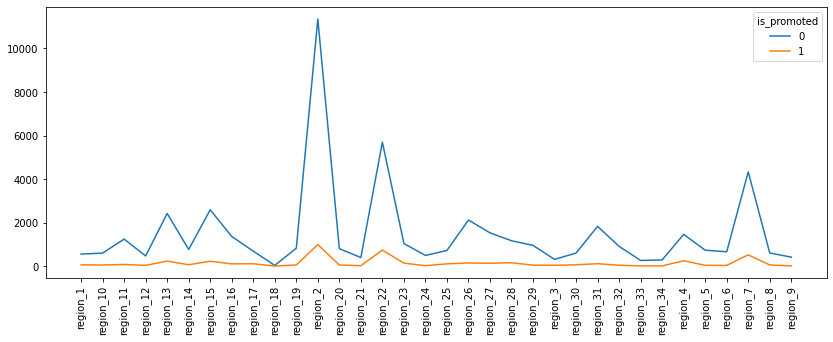

In [14]:
crosstab = pd.crosstab(index=emp_data['region'],columns=emp_data['is_promoted']) 
plt.figure(figsize=(14,5))
plt.plot(crosstab)
plt.legend(crosstab,title='is_promoted')
plt.xticks(rotation=90)
plt.show()

### Determining the Promoted candidates WRT Department

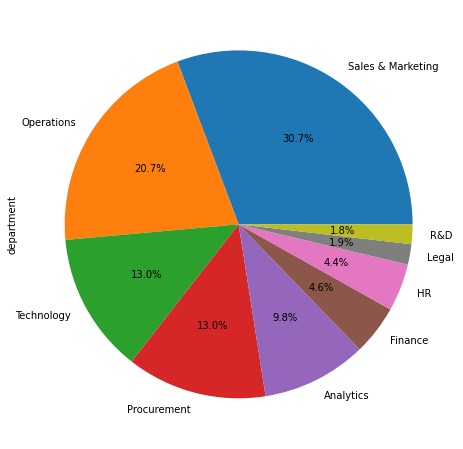

In [15]:
emp_data["department"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8))
plt.show()

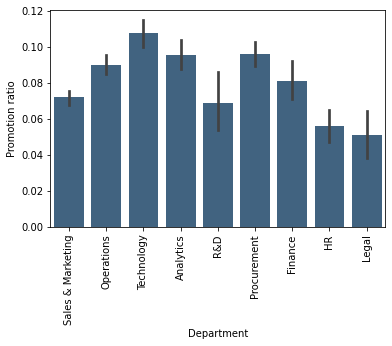

In [16]:
sns.barplot(data=emp_data, x = "department",y='is_promoted',color = '#36648B')
plt.xticks(rotation=90)
plt.xlabel('Department')
plt.ylabel('Promotion ratio')
plt.show()

###  Gender wise Determining the Promoted candidates 

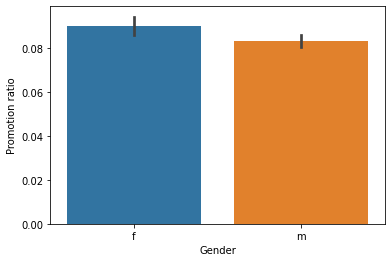

In [17]:
sns.barplot(data=emp_data, x = "gender",y='is_promoted')
plt.xlabel('Gender')
plt.ylabel('Promotion ratio')
plt.show()

###  Age wise Determining the Promoted candidates 

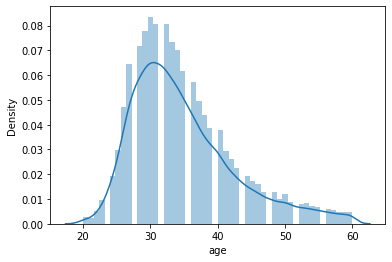

In [18]:
sns.distplot(emp_data['age'])
plt.show()

### Total Ratio of Promoted and Non_Promoted candidates

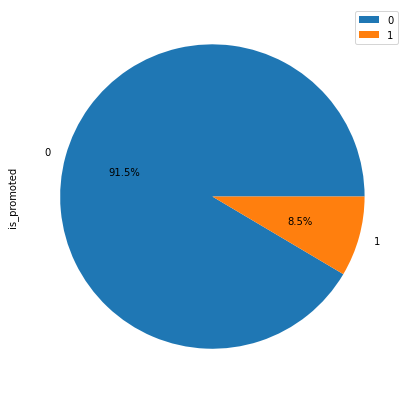

In [19]:
emp_data["is_promoted"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(7,7), startangle=0).legend()
plt.show()

### Determining the Promoted candidates WRT their Previous_year_Ratings

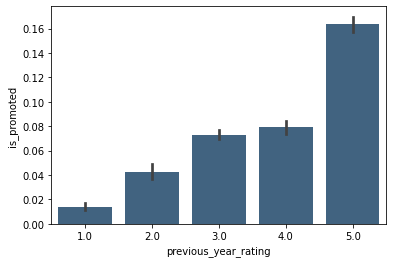

In [20]:
sns.barplot( x = "previous_year_rating",y = 'is_promoted',data=emp_data,color = '#36648B')
plt.show()

### Determining the Promoted candidates WRT Award Won

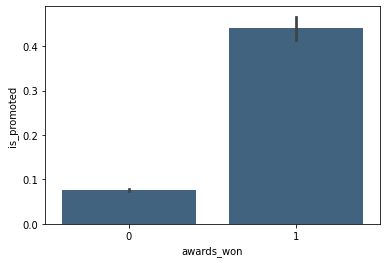

In [21]:
sns.barplot( x = "awards_won",y = 'is_promoted',data=emp_data,color = '#36648B')
plt.show()

## 4. Data Preprocessing

###  Filling the NULL Values

In [22]:
emp_data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [23]:
emp_data['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [24]:
emp_data['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [25]:
print("education mode: ",emp_data['education'].mode())
print("Previous year rationg mean: ",emp_data['previous_year_rating'].mean())
print("avg traing score mean: ",emp_data['avg_training_score'].mean())


education mode:  0    Bachelor's
dtype: object
Previous year rationg mean:  3.329255780917055
avg traing score mean:  63.71223778900628


In [26]:
emp_data['education'] = emp_data['education'].fillna(emp_data['education'].mode()[0])
emp_data['previous_year_rating'] = emp_data['previous_year_rating'].fillna(0)
emp_data['avg_training_score'] = emp_data['avg_training_score'].fillna(emp_data['avg_training_score'].mean()).round(0)

In [27]:
emp_data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

In [28]:
emp_data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,64.0,0


### Deleting Unnecessary Features

In [29]:
emp_data = emp_data.drop(['employee_id','recruitment_channel','region'],axis =1)
emp_data

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,1,35,5.0,8,0,49.0,0
1,Operations,Bachelor's,m,1,30,5.0,4,0,60.0,0
2,Sales & Marketing,Bachelor's,m,1,34,3.0,7,0,50.0,0
3,Sales & Marketing,Bachelor's,m,2,39,1.0,10,0,50.0,0
4,Technology,Bachelor's,m,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...
54803,Technology,Bachelor's,m,1,48,3.0,17,0,78.0,0
54804,Operations,Master's & above,f,1,37,2.0,6,0,56.0,0
54805,Analytics,Bachelor's,m,1,27,5.0,3,0,79.0,0
54806,Sales & Marketing,Bachelor's,m,1,29,1.0,2,0,64.0,0


### Implimenting Label Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
emp_data['gender'] = le.fit_transform(emp_data['gender'])
emp_data['education'] = le.fit_transform(emp_data['education'])
emp_data['department'] = le.fit_transform(emp_data['department'])

In [31]:
emp_data

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,7,2,0,1,35,5.0,8,0,49.0,0
1,4,0,1,1,30,5.0,4,0,60.0,0
2,7,0,1,1,34,3.0,7,0,50.0,0
3,7,0,1,2,39,1.0,10,0,50.0,0
4,8,0,1,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...
54803,8,0,1,1,48,3.0,17,0,78.0,0
54804,4,2,0,1,37,2.0,6,0,56.0,0
54805,0,0,1,1,27,5.0,3,0,79.0,0
54806,7,0,1,1,29,1.0,2,0,64.0,0


In [32]:
emp_data.dtypes

department                int64
education                 int64
gender                    int64
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score      float64
is_promoted               int64
dtype: object

## 5. Model Building | 6. Model Training | 7. Model Testing

In [33]:
x = emp_data.drop(labels='is_promoted',axis=1)
y = emp_data[['is_promoted']]
x,y

(       department  education  gender  no_of_trainings  age  \
 0               7          2       0                1   35   
 1               4          0       1                1   30   
 2               7          0       1                1   34   
 3               7          0       1                2   39   
 4               8          0       1                1   45   
 ...           ...        ...     ...              ...  ...   
 54803           8          0       1                1   48   
 54804           4          2       0                1   37   
 54805           0          0       1                1   27   
 54806           7          0       1                1   29   
 54807           2          0       1                1   27   
 
        previous_year_rating  length_of_service  awards_won  avg_training_score  
 0                       5.0                  8           0                49.0  
 1                       5.0                  4           0                60.

In [34]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = std.fit_transform(x)

In [35]:
x

array([[ 0.80893285,  1.61975831, -1.53622276, ...,  0.50045956,
        -0.15401776, -1.11538291],
       [-0.38818322, -0.62883817,  0.65094726, ..., -0.43739464,
        -0.15401776, -0.28219809],
       [ 0.80893285, -0.62883817,  0.65094726, ...,  0.26599601,
        -0.15401776, -1.03963884],
       ...,
       [-1.98433798, -0.62883817,  0.65094726, ..., -0.67185819,
        -0.15401776,  1.15693933],
       [ 0.80893285, -0.62883817,  0.65094726, ..., -0.90632174,
        -0.15401776,  0.02077821],
       [-1.1862606 , -0.62883817,  0.65094726, ..., -0.20293109,
        -0.15401776, -1.11538291]])

In [36]:
x.shape, y.shape

((54808, 9), (54808, 1))

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)
x_train.shape, y_train.shape

((43846, 9), (43846, 1))

In [38]:
x_test.shape, y_test.shape

((10962, 9), (10962, 1))

### Model building using LogisticRegression

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression

logistic_model=LogisticRegression(class_weight={0:0.1,1:0.9})
logistic_model.fit(x_train,y_train)


LogisticRegression(class_weight={0: 0.1, 1: 0.9})

In [40]:
y_train.value_counts()

is_promoted
0              40099
1               3747
dtype: int64

In [41]:
y_pred_train=logistic_model.predict(x_train)
print('Train_data  :')
print('==================================================================')
print('Accuracy_score :',accuracy_score(y_train,y_pred_train))
print('Confusion_metrix :')
print(confusion_matrix(y_train,y_pred_train))
print('Classificaton_report :')
print(classification_report(y_train,y_pred_train))

y_pred_test=logistic_model.predict(x_test)
print('Test_data  :')
print('==================================================================')
print('Accuracy_score :',accuracy_score(y_test,y_pred_test))
print('Confusion_metrix :')
print(confusion_matrix(y_test,y_pred_test))
print('Classificaton_report :')
print(classification_report(y_test,y_pred_test))

Train_data  :
Accuracy_score : 0.7495552615974092
Confusion_metrix :
[[30813  9286]
 [ 1695  2052]]
Classificaton_report :
              precision    recall  f1-score   support

           0       0.95      0.77      0.85     40099
           1       0.18      0.55      0.27      3747

    accuracy                           0.75     43846
   macro avg       0.56      0.66      0.56     43846
weighted avg       0.88      0.75      0.80     43846

Test_data  :
Accuracy_score : 0.7407407407407407
Confusion_metrix :
[[7619 2422]
 [ 420  501]]
Classificaton_report :
              precision    recall  f1-score   support

           0       0.95      0.76      0.84     10041
           1       0.17      0.54      0.26       921

    accuracy                           0.74     10962
   macro avg       0.56      0.65      0.55     10962
weighted avg       0.88      0.74      0.79     10962



In [42]:
y_train.value_counts()

is_promoted
0              40099
1               3747
dtype: int64

### Balencing both the Classes In train data and Recheck the accuracy with Logistic Regression

In [43]:
from imblearn.over_sampling import SMOTE

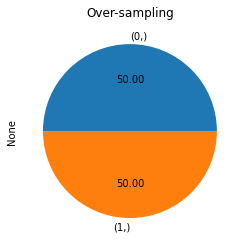

In [44]:
over_sample = SMOTE(sampling_strategy="not majority")
x_train_os, y_train_os = over_sample.fit_resample(x_train, y_train)

ax = y_train_os.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [45]:
x_train_os.shape, y_train_os.shape

((80198, 9), (80198, 1))

In [48]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

y_pred_train_os=logistic_model.predict(x_train_os)
print('Train_data  :')
print('==================================================================')
print('Accuracy_score :',accuracy_score(y_train_os,y_pred_train_os))
print('Confusion_metrix :')
print(confusion_matrix(y_train_os,y_pred_train_os))
print('Classificaton_report :')
print(classification_report(y_train_os,y_pred_train_os))

y_pred_test=logistic_model.predict(x_test)
print('Test_data  :')
print('==================================================================')
print('Accuracy_score :',accuracy_score(y_test,y_pred_test))
print('Confusion_metrix :')
print(confusion_matrix(y_test,y_pred_test))
print('Classificaton_report :')
print(classification_report(y_test,y_pred_test))

Train_data  :
Accuracy_score : 0.5335419835906132
Confusion_metrix :
[[39988   111]
 [37298  2801]]
Classificaton_report :
              precision    recall  f1-score   support

           0       0.52      1.00      0.68     40099
           1       0.96      0.07      0.13     40099

    accuracy                           0.53     80198
   macro avg       0.74      0.53      0.41     80198
weighted avg       0.74      0.53      0.41     80198

Test_data  :
Accuracy_score : 0.9208173690932312
Confusion_metrix :
[[10014    27]
 [  841    80]]
Classificaton_report :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10041
           1       0.75      0.09      0.16       921

    accuracy                           0.92     10962
   macro avg       0.84      0.54      0.56     10962
weighted avg       0.91      0.92      0.89     10962



### Model Building By using DecisionTree

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_model=dt.fit(x_train_os,y_train_os)


y_pred_train_os=dt_model.predict(x_train_os)
print('Train_data  :')
print('==================================================================')
print('Accuracy_score :',accuracy_score(y_train_os,y_pred_train_os))
print('Confusion_metrix :')
print(confusion_matrix(y_train_os,y_pred_train_os))
print('Classificaton_report :')
print(classification_report(y_train_os,y_pred_train_os))

y_pred_test=dt_model.predict(x_test)
print('Test_data  :')
print('==================================================================')
print('Accuracy_score :',accuracy_score(y_test,y_pred_test))
print('Confusion_metrix :')
print(confusion_matrix(y_test,y_pred_test))
print('Classificaton_report :')
print(classification_report(y_test,y_pred_test))

Train_data  :
Accuracy_score : 0.9930297513653707
Confusion_metrix :
[[40055    44]
 [  515 39584]]
Classificaton_report :
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     40099
           1       1.00      0.99      0.99     40099

    accuracy                           0.99     80198
   macro avg       0.99      0.99      0.99     80198
weighted avg       0.99      0.99      0.99     80198

Test_data  :
Accuracy_score : 0.886152162014231
Confusion_metrix :
[[9369  672]
 [ 576  345]]
Classificaton_report :
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10041
           1       0.34      0.37      0.36       921

    accuracy                           0.89     10962
   macro avg       0.64      0.65      0.65     10962
weighted avg       0.89      0.89      0.89     10962



### Model Building By using RandomForestClassifier

In [50]:
from sklearn.ensemble import RandomForestClassifier 
rf_model=RandomForestClassifier(n_estimators=17, criterion='gini',max_depth=5)
rf_model.fit(x_train_os,y_train_os)

y_pred_train_os=rf_model.predict(x_train_os)
print('Train_data  :')
print('==================================================================')
print('Accuracy_score :',accuracy_score(y_train_os,y_pred_train_os))
print('Confusion_metrix :')
print(confusion_matrix(y_train_os,y_pred_train_os))
print('Classificaton_report :')
print(classification_report(y_train_os,y_pred_train_os))

y_pred_test=rf_model.predict(x_test)
print('Test_data  :')
print('==================================================================')
print('Accuracy_score :',accuracy_score(y_test,y_pred_test))
print('Confusion_metrix :')
print(confusion_matrix(y_test,y_pred_test))
print('Classificaton_report :')
print(classification_report(y_test,y_pred_test))

Train_data  :
Accuracy_score : 0.7047931369859598
Confusion_metrix :
[[32643  7456]
 [16219 23880]]
Classificaton_report :
              precision    recall  f1-score   support

           0       0.67      0.81      0.73     40099
           1       0.76      0.60      0.67     40099

    accuracy                           0.70     80198
   macro avg       0.72      0.70      0.70     80198
weighted avg       0.72      0.70      0.70     80198

Test_data  :
Accuracy_score : 0.7891808064221857
Confusion_metrix :
[[8171 1870]
 [ 441  480]]
Classificaton_report :
              precision    recall  f1-score   support

           0       0.95      0.81      0.88     10041
           1       0.20      0.52      0.29       921

    accuracy                           0.79     10962
   macro avg       0.58      0.67      0.58     10962
weighted avg       0.89      0.79      0.83     10962



### Model Building By using AdaBoostClassifier

In [51]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=17,random_state=0 ,learning_rate=0.07)
                                    
ada_model.fit(x_train_os,y_train_os)

y_pred_train_os=ada_model.predict(x_train_os)
print('Train_data  :')
print('==================================================================')
print('Accuracy_score :',accuracy_score(y_train_os,y_pred_train_os))
print('Confusion_metrix :')
print(confusion_matrix(y_train_os,y_pred_train_os))
print('Classificaton_report :')
print(classification_report(y_train_os,y_pred_train_os))

y_pred_test=ada_model.predict(x_test)
print('Test_data  :')
print('==================================================================')
print('Accuracy_score :',accuracy_score(y_test,y_pred_test))
print('Confusion_metrix :')
print(confusion_matrix(y_test,y_pred_test))
print('Classificaton_report :')
print(classification_report(y_test,y_pred_test))

Train_data  :
Accuracy_score : 0.6754407840594528
Confusion_metrix :
[[31332  8767]
 [17262 22837]]
Classificaton_report :
              precision    recall  f1-score   support

           0       0.64      0.78      0.71     40099
           1       0.72      0.57      0.64     40099

    accuracy                           0.68     80198
   macro avg       0.68      0.68      0.67     80198
weighted avg       0.68      0.68      0.67     80198

Test_data  :
Accuracy_score : 0.7640029191753329
Confusion_metrix :
[[7879 2162]
 [ 425  496]]
Classificaton_report :
              precision    recall  f1-score   support

           0       0.95      0.78      0.86     10041
           1       0.19      0.54      0.28       921

    accuracy                           0.76     10962
   macro avg       0.57      0.66      0.57     10962
weighted avg       0.88      0.76      0.81     10962



### Model Building By using GradientBoostingClassifier

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import GridSearchCV,cross_validate,validation_curve

# param_grid = {

# "learning_rate": [0.01, 0.1, 0.001, 0.0001], "min_samples_split": np.linspace (1, 5, 1),

# "max_depth": [3,5,8],

# "max_features":["log2", "sqrt"],

# "criterion": ["friedman_mse", "mae"], "n_estimators":[10, 20, 30, 50, 100]

# }

# # Create a based model
# gb_search= GridSearchCV (estimator = gb_model, param_grid = param_grid, cv = 3, n_jobs = -1
# print('best parameters: ',gb_search.best_params_)

# y_pred_ =gb_search.best_estimator_.predict(x_test) 
# print("hyper tuned gradient boost accuracy :", accuracy_score (y_test, y_pred_))

# best parameters: {'criterion': 'friedman_mse', 'learning_rate": 0.1, 'max_depth

# it': 1.0, 'n estimators': 100}

# hyper tuned gradient boost accuracy 0.6722365038560412 

gb_model = GradientBoostingClassifier(learning_rate=0.07,max_depth=5,max_features='log2',n_estimators=19)
gb_model.fit(x_train_os,y_train_os)

                        

y_pred_train_os=gb_model.predict(x_train_os)
print('Train_data  :')
print('==================================================================')
print('Accuracy_score :',accuracy_score(y_train_os,y_pred_train_os))
print('Confusion_metrix :')
print(confusion_matrix(y_train_os,y_pred_train_os))
print('Classificaton_report :')
print(classification_report(y_train_os,y_pred_train_os))

y_pred_test=gb_model.predict(x_test)
print('Test_data  :')
print('==================================================================')
print('Accuracy_score :',accuracy_score(y_test,y_pred_test))
print('Confusion_metrix :')
print(confusion_matrix(y_test,y_pred_test))
print('Classificaton_report :')
print(classification_report(y_test,y_pred_test))

Train_data  :
Accuracy_score : 0.7671388313923041
Confusion_metrix :
[[35440  4659]
 [14016 26083]]
Classificaton_report :
              precision    recall  f1-score   support

           0       0.72      0.88      0.79     40099
           1       0.85      0.65      0.74     40099

    accuracy                           0.77     80198
   macro avg       0.78      0.77      0.76     80198
weighted avg       0.78      0.77      0.76     80198

Test_data  :
Accuracy_score : 0.8483853311439519
Confusion_metrix :
[[8856 1185]
 [ 477  444]]
Classificaton_report :
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     10041
           1       0.27      0.48      0.35       921

    accuracy                           0.85     10962
   macro avg       0.61      0.68      0.63     10962
weighted avg       0.89      0.85      0.87     10962



### Model Building By using ExtreamGradientBoosting Clasifier

In [53]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(booster = 'gbtree',learning_rate=0.1, gamma =1,max_depth=17,n_estimators=100)
xgb_model.fit(x_train_os,y_train_os)


y_pred_train_os=xgb_model.predict(x_train_os)
print('Train_data  :')
print('==================================================================')
print('Accuracy_score :',accuracy_score(y_train_os,y_pred_train_os))
print('Confusion_metrix :')
print(confusion_matrix(y_train_os,y_pred_train_os))
print('Classificaton_report :')
print(classification_report(y_train_os,y_pred_train_os))

y_pred_test=xgb_model.predict(x_test)
print('Test_data  :')
print('==================================================================')
print('Accuracy_score :',accuracy_score(y_test,y_pred_test))
print('Confusion_metrix :')
print(confusion_matrix(y_test,y_pred_test))
print('Classificaton_report :')
print(classification_report(y_test,y_pred_test))

Train_data  :
Accuracy_score : 0.9749869074041747
Confusion_metrix :
[[39992   107]
 [ 1899 38200]]
Classificaton_report :
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     40099
           1       1.00      0.95      0.97     40099

    accuracy                           0.97     80198
   macro avg       0.98      0.97      0.97     80198
weighted avg       0.98      0.97      0.97     80198

Test_data  :
Accuracy_score : 0.9365079365079365
Confusion_metrix :
[[9943   98]
 [ 598  323]]
Classificaton_report :
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10041
           1       0.77      0.35      0.48       921

    accuracy                           0.94     10962
   macro avg       0.86      0.67      0.72     10962
weighted avg       0.93      0.94      0.93     10962



### Model Building By using LightGradientBoosting Classifier

In [54]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(booster ='gbtree',learning_rate=0.1,random_state=0, max_depth=23,n_estimators=150)
lgbm_model.fit(x_train_os,y_train_os)

y_pred_train_os=lgbm_model.predict(x_train_os)
print('Train_data  :')
print('==================================================================')
print('Accuracy_score :',accuracy_score(y_train_os,y_pred_train_os))
print('Confusion_metrix :')
print(confusion_matrix(y_train_os,y_pred_train_os))
print('Classificaton_report :')
print(classification_report(y_train_os,y_pred_train_os))

y_pred_test=lgbm_model.predict(x_test)
print('Test_data  :')
print('==================================================================')
print('Accuracy_score :',accuracy_score(y_test,y_pred_test))
print('Confusion_metrix :')
print(confusion_matrix(y_test,y_pred_test))
print('Classificaton_report :')
print(classification_report(y_test,y_pred_test))

Train_data  :
Accuracy_score : 0.9610339409960348
Confusion_metrix :
[[39971   128]
 [ 2997 37102]]
Classificaton_report :
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     40099
           1       1.00      0.93      0.96     40099

    accuracy                           0.96     80198
   macro avg       0.96      0.96      0.96     80198
weighted avg       0.96      0.96      0.96     80198

Test_data  :
Accuracy_score : 0.9407042510490786
Confusion_metrix :
[[10006    35]
 [  615   306]]
Classificaton_report :
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10041
           1       0.90      0.33      0.48       921

    accuracy                           0.94     10962
   macro avg       0.92      0.66      0.73     10962
weighted avg       0.94      0.94      0.93     10962



### Model Building By using SupportVectorMachine

In [55]:
from sklearn.svm import SVC
svc_model  = SVC(kernel="rbf",C=0.1, gamma='scale')
svc_model.fit(x_train_os,y_train_os)

y_pred_train_os=svc_model.predict(x_train_os)
print('Train_data  :')
print('==================================================================')
print('Accuracy_score :',accuracy_score(y_train_os,y_pred_train_os))
print('Confusion_metrix :')
print(confusion_matrix(y_train_os,y_pred_train_os))
print('Classificaton_report :')
print(classification_report(y_train_os,y_pred_train_os))

y_pred_test=svc_model.predict(x_test)
print('Test_data  :')
print('==================================================================')
print('Accuracy_score :',accuracy_score(y_test,y_pred_test))
print('Confusion_metrix :')
print(confusion_matrix(y_test,y_pred_test))
print('Classificaton_report :')
print(classification_report(y_test,y_pred_test))

Train_data  :
Accuracy_score : 0.6915758497718147
Confusion_metrix :
[[30710  9389]
 [15346 24753]]
Classificaton_report :
              precision    recall  f1-score   support

           0       0.67      0.77      0.71     40099
           1       0.73      0.62      0.67     40099

    accuracy                           0.69     80198
   macro avg       0.70      0.69      0.69     80198
weighted avg       0.70      0.69      0.69     80198

Test_data  :
Accuracy_score : 0.7480386790731618
Confusion_metrix :
[[7653 2388]
 [ 374  547]]
Classificaton_report :
              precision    recall  f1-score   support

           0       0.95      0.76      0.85     10041
           1       0.19      0.59      0.28       921

    accuracy                           0.75     10962
   macro avg       0.57      0.68      0.57     10962
weighted avg       0.89      0.75      0.80     10962



### Model Building By using K Nearest Neighbors

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train_os,y_train_os)

y_pred_train=knn_model.predict(x_train_os)
print('Train_data  :')
print('==================================================================')
print('Accuracy_score :',accuracy_score(y_train_os,y_pred_train))
print('Confusion_metrix :')
print(confusion_matrix(y_train_os,y_pred_train_os))
print('Classificaton_report :')
print(classification_report(y_train_os,y_pred_train_os))

y_pred_test=knn_model.predict(x_test)
print('Test_data  :')
print('==================================================================')
print('Accuracy_score :',accuracy_score(y_test,y_pred_test))
print('Confusion_metrix :')
print(confusion_matrix(y_test,y_pred_test))
print('Classificaton_report :')
print(classification_report(y_test,y_pred_test))


Train_data  :
Accuracy_score : 0.9914461707274496
Confusion_metrix :
[[30710  9389]
 [15346 24753]]
Classificaton_report :
              precision    recall  f1-score   support

           0       0.67      0.77      0.71     40099
           1       0.73      0.62      0.67     40099

    accuracy                           0.69     80198
   macro avg       0.70      0.69      0.69     80198
weighted avg       0.70      0.69      0.69     80198

Test_data  :
Accuracy_score : 0.8481116584564861
Confusion_metrix :
[[8959 1082]
 [ 583  338]]
Classificaton_report :
              precision    recall  f1-score   support

           0       0.94      0.89      0.91     10041
           1       0.24      0.37      0.29       921

    accuracy                           0.85     10962
   macro avg       0.59      0.63      0.60     10962
weighted avg       0.88      0.85      0.86     10962



### Model Building By using Catboost classifier

In [57]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [58]:
from catboost import CatBoostClassifier 
catboost = CatBoostClassifier(learning_rate = 0.1,max_depth = 16,random_state=0, n_estimators=150)
catboost.fit(x_train_os,y_train_os)

y_pred_train_os=catboost.predict(x_train_os)
print('Train_data  :')
print('==================================================================')
print('Accuracy_score :',accuracy_score(y_train_os,y_pred_train_os))
print('Confusion_metrix :')
print(confusion_matrix(y_train_os,y_pred_train_os))
print('Classificaton_report :')
print(classification_report(y_train_os,y_pred_train_os))

y_pred_test=catboost.predict(x_test)
print('Test_data  :')
print('==================================================================')
print('Accuracy_score :',accuracy_score(y_test,y_pred_test))
print('Confusion_metrix :')
print(confusion_matrix(y_test,y_pred_test))
print('Classificaton_report :')
print(classification_report(y_test,y_pred_test))

0:	learn: 0.6670901	total: 3.63s	remaining: 9m 1s
1:	learn: 0.6401234	total: 6.98s	remaining: 8m 36s
2:	learn: 0.6188975	total: 12.1s	remaining: 9m 54s
3:	learn: 0.5970035	total: 17.6s	remaining: 10m 40s
4:	learn: 0.5815867	total: 22.6s	remaining: 10m 55s
5:	learn: 0.5659087	total: 27.8s	remaining: 11m 6s
6:	learn: 0.5516475	total: 32.9s	remaining: 11m 12s
7:	learn: 0.5391639	total: 38.1s	remaining: 11m 16s
8:	learn: 0.5257450	total: 43.3s	remaining: 11m 18s
9:	learn: 0.5149596	total: 48.1s	remaining: 11m 12s
10:	learn: 0.5036482	total: 50.9s	remaining: 10m 42s
11:	learn: 0.4960516	total: 53.9s	remaining: 10m 19s
12:	learn: 0.4876836	total: 56.5s	remaining: 9m 55s
13:	learn: 0.4787171	total: 59.3s	remaining: 9m 35s
14:	learn: 0.4704665	total: 1m 1s	remaining: 9m 15s
15:	learn: 0.4581589	total: 1m 4s	remaining: 8m 59s
16:	learn: 0.4484665	total: 1m 7s	remaining: 8m 46s
17:	learn: 0.4424018	total: 1m 10s	remaining: 8m 35s
18:	learn: 0.4345886	total: 1m 13s	remaining: 8m 24s
19:	learn: 0.

### Model Building By using Nural Network


In [59]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import InputLayer,Dense,Flatten, MaxPool2D


In [60]:
print("x train data shape: ",x_train.shape)
print("y train data shape: ",y_train.shape)
print("x test data shape: ",x_test.shape)
print("x test data shape: ",y_test.shape)

x train data shape:  (43846, 9)
y train data shape:  (43846, 1)
x test data shape:  (10962, 9)
x test data shape:  (10962, 1)


In [61]:
input_neurons = x_train_os.shape[1]
output_neurons = 1
number_of_hidden_layers = 3
neuron_hidden_layer_1 = 256
neuron_hidden_layer_2 = 128
neuron_hidden_layer_3 = 64
neuron_hidden_layer_4 = 32
neuron_hidden_layer_5 = 16


nn = Sequential()
nn.add(InputLayer(input_shape=(input_neurons,)))
nn.add(Dense(units=neuron_hidden_layer_1,activation = 'tanh'))
nn.add(Dense(units=neuron_hidden_layer_2,activation = 'tanh'))
nn.add(Dense(units=neuron_hidden_layer_3,activation = 'tanh'))
nn.add(Dense(units=neuron_hidden_layer_4,activation = 'tanh'))
nn.add(Dense(units=neuron_hidden_layer_5,activation = 'tanh'))
nn.add(Dense(units=output_neurons,activation = 'sigmoid'))
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 46,337
Trainable params: 46,337
Non-traina

In [62]:
#compile the model
nn.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

# Train the model
model_history = nn.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
1371/1371 [==============================] - 8s 5ms/step - loss: 0.2615 - accuracy: 0.9160 - val_loss: 0.2430 - val_accuracy: 0.9249
Epoch 2/20
1371/1371 [==============================] - 10s 7ms/step - loss: 0.2414 - accuracy: 0.9246 - val_loss: 0.2422 - val_accuracy: 0.9216
Epoch 3/20
1371/1371 [==============================] - 11s 8ms/step - loss: 0.2312 - accuracy: 0.9294 - val_loss: 0.2244 - val_accuracy: 0.9299
Epoch 4/20
1371/1371 [==============================] - 11s 8ms/step - loss: 0.2270 - accuracy: 0.9308 - val_loss: 0.2165 - val_accuracy: 0.9338
Epoch 5/20
1371/1371 [==============================] - 6s 5ms/step - loss: 0.2234 - accuracy: 0.9320 - val_loss: 0.2232 - val_accuracy: 0.9319
Epoch 6/20
1371/1371 [==============================] - 5s 4ms/step - loss: 0.2206 - accuracy: 0.9329 - val_loss: 0.2157 - val_accuracy: 0.9349
Epoch 7/20
1371/1371 [==============================] - 4s 3ms/step - loss: 0.2220 - accuracy: 0.9327 - val_loss: 0.2103 - val_accura

In [63]:
#model performance evaluation
y_pred = nn.predict(x_test)
y_pred_train = nn.predict(x_train)
nn_train_acc = (accuracy_score(y_train,y_pred_train.round()))
nn_test_acc = (accuracy_score(y_test,y_pred.round()))
print("Train accuracy: ",nn_train_acc)
print("Test accuracy: ",nn_test_acc)
print("classification report: \n",classification_report(y_test,y_pred.round()))
print("confusion matrix: ")
print(confusion_matrix(y_test,y_pred.round()))

Train accuracy:  0.9381243442959449
Test accuracy:  0.939427111840905
classification report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     10041
           1       0.92      0.30      0.46       921

    accuracy                           0.94     10962
   macro avg       0.93      0.65      0.71     10962
weighted avg       0.94      0.94      0.93     10962

confusion matrix: 
[[10018    23]
 [  641   280]]


## 8. Deployment of Lightgradient Boosting Model

In [64]:
import pickle
from pickle import dump
dump(lgbm_model,open('lgbm_model.pkl','wb'))